In [ ]:
import csv
import random
from datetime import datetime
import time
import os

# File name
file_name = "live_sensor_data.csv"

# Create file with header if it doesn't exist
if not os.path.exists(file_name):
    with open(file_name, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["sensor_id", "temperature", "humidity", "timestamp"])

sensors = ['s1', 's2', 's3', 's4', 's5']

# Thresholds for alert
TEMP_HIGH = 50
HUMID_HIGH = 80
TEMP_LOW = 20
HUMID_LOW = 40

# Generate live data
while True:
    sensor_id = random.choice(sensors)
    temperature = random.randint(18, 60)
    humidity = random.randint(35, 85)
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Append to CSV
    with open(file_name, mode='a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([sensor_id, temperature, humidity, timestamp])

    # Print live data
    print(f"{sensor_id},{temperature},{humidity},{timestamp}")

    # --- Alert System ---
    if temperature > TEMP_HIGH:
        print(f"🚨 ALERT: High Temperature detected at {sensor_id} = {temperature}°C")
    elif temperature < TEMP_LOW:
        print(f"⚠ ALERT: Low Temperature detected at {sensor_id} = {temperature}°C")

    if humidity > HUMID_HIGH:
        print(f"🚨 ALERT: High Humidity detected at {sensor_id} = {humidity}%")
    elif humidity < HUMID_LOW:
        print(f"⚠ ALERT: Low Humidity detected at {sensor_id} = {humidity}%")

    time.sleep(1)  # simulate 1-second interval

s1,25,83,2025-09-17 06:08:51
🚨 ALERT: High Humidity detected at s1 = 83%
s3,42,81,2025-09-17 06:08:52
🚨 ALERT: High Humidity detected at s3 = 81%
s1,53,50,2025-09-17 06:08:53
🚨 ALERT: High Temperature detected at s1 = 53°C
s3,28,42,2025-09-17 06:08:54
s2,20,45,2025-09-17 06:08:55
s3,52,65,2025-09-17 06:08:56
🚨 ALERT: High Temperature detected at s3 = 52°C
s5,47,43,2025-09-17 06:08:57
s5,21,41,2025-09-17 06:08:58
s1,28,67,2025-09-17 06:08:59
s4,37,38,2025-09-17 06:09:00
⚠ ALERT: Low Humidity detected at s4 = 38%
s5,57,70,2025-09-17 06:09:01
🚨 ALERT: High Temperature detected at s5 = 57°C
s1,60,57,2025-09-17 06:09:02
🚨 ALERT: High Temperature detected at s1 = 60°C
s1,38,62,2025-09-17 06:09:03
s4,30,57,2025-09-17 06:09:04
s1,42,46,2025-09-17 06:09:05
s3,38,49,2025-09-17 06:09:06
s4,46,83,2025-09-17 06:09:07
🚨 ALERT: High Humidity detected at s4 = 83%
s2,22,73,2025-09-17 06:09:08
s1,35,61,2025-09-17 06:09:09
s1,50,77,2025-09-17 06:09:10
s2,49,77,2025-09-17 06:09:11
s2,56,70,2025-09-17 06:0

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import time
import datetime

file_name = "live_sensor_data.csv"

# Thresholds for alerts
TEMP_HIGH = 50
TEMP_LOW = 20
HUMID_HIGH = 80
HUMID_LOW = 40

# Set end time to 30 seconds from now
end_time = datetime.datetime.now() + datetime.timedelta(seconds=30)

while datetime.datetime.now() < end_time:
    # Read latest data
    df = pd.read_csv(file_name)

    # Data cleaning
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df[(df['temperature'] >= 15) & (df['temperature'] <= 60)]
    df = df[(df['humidity'] >= 30) & (df['humidity'] <= 90)]

    # Print statistics
    print("\nTotal records:", len(df))
    print("Average temperature per sensor:")
    print(df.groupby('sensor_id')['temperature'].mean())
    print("Average humidity per sensor:")
    print(df.groupby('sensor_id')['humidity'].mean())

    # --- Alerts check ---
    alerts = df[(df['temperature'] > TEMP_HIGH) | (df['temperature'] < TEMP_LOW) |
                (df['humidity'] > HUMID_HIGH) | (df['humidity'] < HUMID_LOW)]

    if not alerts.empty:
        print("\n🚨 ALERTS DETECTED:")
        for _, row in alerts.iterrows():
            msg = f"Sensor {row['sensor_id']} | Temp={row['temperature']}°C | Humidity={row['humidity']}% | Time={row['timestamp']}"
            print("  ⚠", msg)

    time.sleep(5)  # pause 5 seconds

print("\n✅ Live streaming stopped automatically!")


Total records: 22
Average temperature per sensor:
sensor_id
s1    41.375000
s2    36.750000
s3    40.000000
s4    37.666667
s5    41.666667
Name: temperature, dtype: float64
Average humidity per sensor:
sensor_id
s1    62.875000
s2    66.250000
s3    59.250000
s4    59.333333
s5    51.333333
Name: humidity, dtype: float64

🚨 ALERTS DETECTED:
  ⚠ Sensor s1 | Temp=25°C | Humidity=83% | Time=2025-09-17 06:08:51
  ⚠ Sensor s3 | Temp=42°C | Humidity=81% | Time=2025-09-17 06:08:52
  ⚠ Sensor s1 | Temp=53°C | Humidity=50% | Time=2025-09-17 06:08:53
  ⚠ Sensor s3 | Temp=52°C | Humidity=65% | Time=2025-09-17 06:08:56
  ⚠ Sensor s4 | Temp=37°C | Humidity=38% | Time=2025-09-17 06:09:00
  ⚠ Sensor s5 | Temp=57°C | Humidity=70% | Time=2025-09-17 06:09:01
  ⚠ Sensor s1 | Temp=60°C | Humidity=57% | Time=2025-09-17 06:09:02
  ⚠ Sensor s4 | Temp=46°C | Humidity=83% | Time=2025-09-17 06:09:07
  ⚠ Sensor s2 | Temp=56°C | Humidity=70% | Time=2025-09-17 06:09:12

Total records: 22
Average temperature per 

In [ ]:
import pandas as pd
import datetime

# File with live sensor data
file_name = "live_sensor_data.csv"

# Thresholds for alerts / valid range
TEMP_MIN, TEMP_MAX = 15, 60
HUMID_MIN, HUMID_MAX = 30, 90

def preprocess_data(file_name):
    """
    Preprocess IoT sensor data:
    - Remove duplicates
    - Handle missing values
    - Filter invalid readings
    - Convert timestamp to datetime
    """
    try:
        # Read CSV
        df = pd.read_csv(file_name)

        # Remove duplicates
        df.drop_duplicates(inplace=True)

        # Handle missing values
        df.dropna(inplace=True)
        # Optionally, fill missing values with mean:
        # df.fillna({'temperature': df['temperature'].mean(), 'humidity': df['humidity'].mean()}, inplace=True)

        # Convert timestamp to datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

        # Filter invalid readings
        df = df[(df['temperature'] >= TEMP_MIN) & (df['temperature'] <= TEMP_MAX)]
        df = df[(df['humidity'] >= HUMID_MIN) & (df['humidity'] <= HUMID_MAX)]

        # Reset index
        df.reset_index(drop=True, inplace=True)

        return df

    except Exception as e:
        print("Error preprocessing data:", e)
        return pd.DataFrame()  # return empty dataframe on error

# Example usage
processed_df = preprocess_data(file_name)
print("✅ Preprocessed Data")
print(processed_df.head())

✅ Preprocessed Data
  sensor_id  temperature  humidity           timestamp
0        s1           25        83 2025-09-17 06:08:51
1        s3           42        81 2025-09-17 06:08:52
2        s1           53        50 2025-09-17 06:08:53
3        s3           28        42 2025-09-17 06:08:54
4        s2           20        45 2025-09-17 06:08:55


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sensor_id    22 non-null     object
 1   temperature  22 non-null     int64 
 2   humidity     22 non-null     int64 
 3   timestamp    22 non-null     object
dtypes: int64(2), object(2)
memory usage: 836.0+ bytes
None

✅ First 5 Rows:
  sensor_id  temperature  humidity            timestamp
0        s1           25        83  2025-09-17 06:08:51
1        s3           42        81  2025-09-17 06:08:52
2        s1           53        50  2025-09-17 06:08:53
3        s3           28        42  2025-09-17 06:08:54
4        s2           20        45  2025-09-17 06:08:55

✅ Missing Values:
sensor_id      0
temperature    0
humidity       0
timestamp      0
dtype: int64

✅ Descriptive Statistics:
       temperature   humidity
count    22.000000  22.000000
mean     39.818182  60.772727
std   

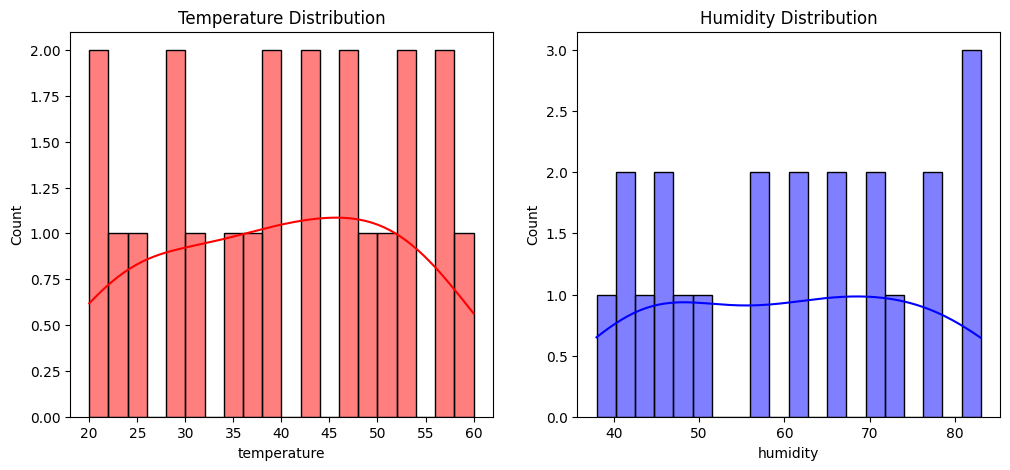


✅ Average Temperature per Sensor:
sensor_id
s1    41.375000
s2    36.750000
s3    40.000000
s4    37.666667
s5    41.666667
Name: temperature, dtype: float64

✅ Average Humidity per Sensor:
sensor_id
s1    62.875000
s2    66.250000
s3    59.250000
s4    59.333333
s5    51.333333
Name: humidity, dtype: float64


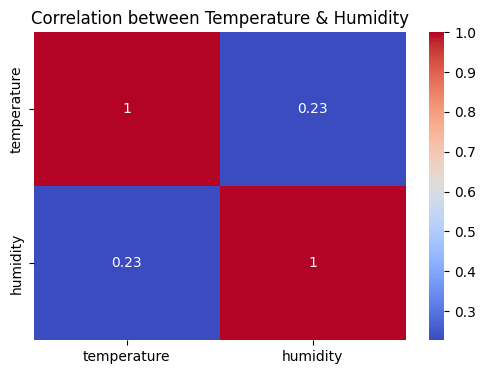

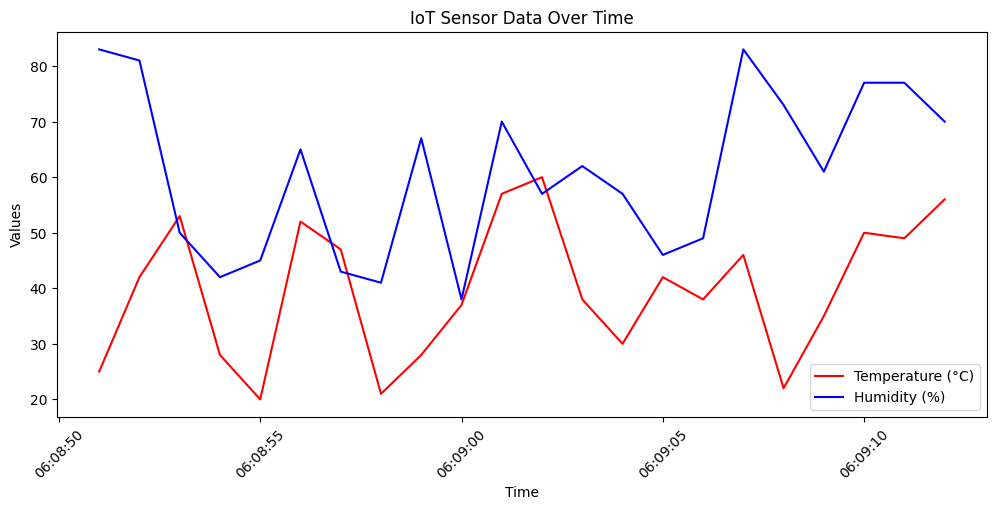